# Task 1

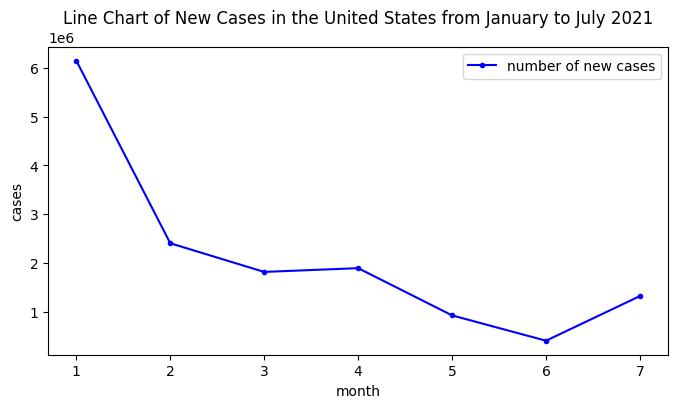

In [97]:
import pandas as pd
import datetime as dt
import numpy as np
import time
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')
df = df[(df['location'] == 'United States')]
df['date'] = pd.to_datetime(df['date'])
df = df[(df['date'] >= pd.to_datetime('2021-01-01')) & (df['date'] <= pd.to_datetime('2021-7-31'))]
month = pd.DatetimeIndex(df['date'].values).month
new_cases = df['new_cases'].values
total = [0, 0, 0, 0, 0, 0, 0]
for i in range(0, len(month)):
    total[month[i] - 1]  = total[month[i] - 1]  + new_cases[i]
plt.figure(figsize=(8, 4))
month = [1, 2, 3, 4, 5, 6, 7]
plt.plot(month, total, 'b.-', label = 'number of new cases')
plt.legend()
plt.title("Line Chart of New Cases in the United States from January to July 2021")
plt.xlabel("month")
plt.ylabel("new cases")
plt.savefig("pic1.png", dpi = 300)
plt.show()

我们发现，上图中 6 月份内美国的感染人数增长最为平缓。

可能的原因是：

- 气候原因：气候转热，病毒传播活力下降。
- 政策原因：2021 年 6 月，美国各州陆续颁布"口罩令"。

# Task 2

[United States] new_cases: (1734748, 41)
[United Kingdom] new_cases: (417726, 41)
[France] new_cases: (490332, 32)
[Germany] new_cases: (403452, 87)
[Russia] new_cases: (273577, 84)
[Italy] new_cases: (243425, 33)
[Japan] new_cases: (158548, 73)


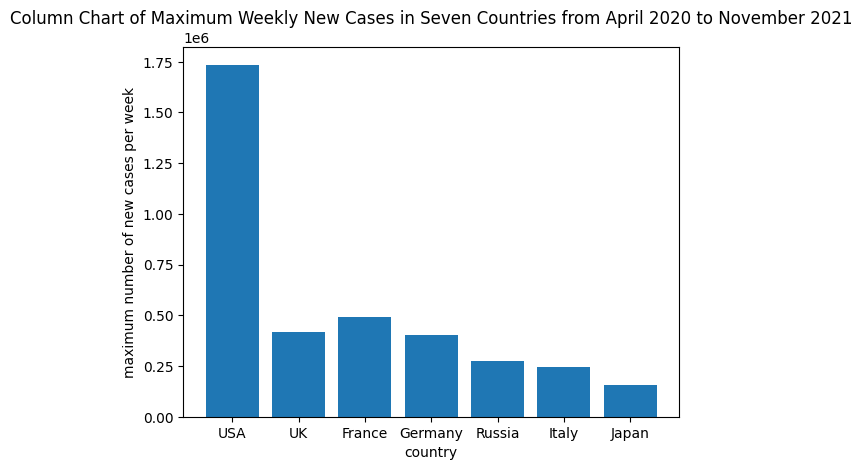

In [147]:
import pandas as pd
import datetime as dt
import numpy as np
import time
import math
import matplotlib.pyplot as plt

def get1(tmp):
    df = pd.read_csv('data.csv')
    df = df[(df['location'] == tmp)]
    df['date'] = pd.to_datetime(df['date'])
    df = df[(df['date'] >= pd.to_datetime('2020-04-01')) & (df['date'] <= pd.to_datetime('2021-11-30'))]
    week_day = pd.DatetimeIndex(df['date'].values).weekday
    new_cases = df['new_cases'].values
    cnt = 0
    sum = []
    last = 0.0
    for i in range(0, len(week_day)):
        if (not math.isnan(new_cases[i])):
            cnt = cnt + 1
            last = last + new_cases[i]
        if (week_day[i] == 6):
            if (cnt != 0):
                sum.append(int(last / cnt * 7.0))
            else:
                sum.append(0)
            cnt = 0
            last = 0
    mx = max(sum)
    id = 0
    for i in range(0, len(sum)):
        if (sum[i] == mx):
            id = i
            break
    return mx, id + 1

print('[United States] new_cases:', get1("United States"))
print('[United Kingdom] new_cases:', get1("United Kingdom"))
print('[France] new_cases:', get1("France"))
print('[Germany] new_cases:', get1("Germany"))
print('[Russia] new_cases:', get1("Russia"))
print('[Italy] new_cases:', get1("Italy"))
print('[Japan] new_cases:', get1("Japan"))


x = ['USA','UK', 'France', 'Germany', 'Russia', 'Italy', 'Japan']
y = [get1("United States")[0], get1("United Kingdom")[0], get1("France")[0], get1("Germany")[0], get1("Russia")[0], get1("Italy")[0], get1("Japan")[0]]

plt.title("Column Chart of Maximum Weekly New Cases in Seven Countries from April 2020 to November 2021")
plt.bar(x, y)
plt.xlabel("country")
plt.ylabel("maximum number of new cases per week")
plt.show()

[United States] new_cases_per_million: (5210, 41)
[United Kingdom] new_cases_per_million: (6124, 41)
[France] new_cases_per_million: (7257, 32)
[Germany] new_cases_per_million: (4808, 87)
[Russia] new_cases_per_million: (1874, 84)
[Italy] new_cases_per_million: (4032, 33)
[Japan] new_cases_per_million: (1257, 73)


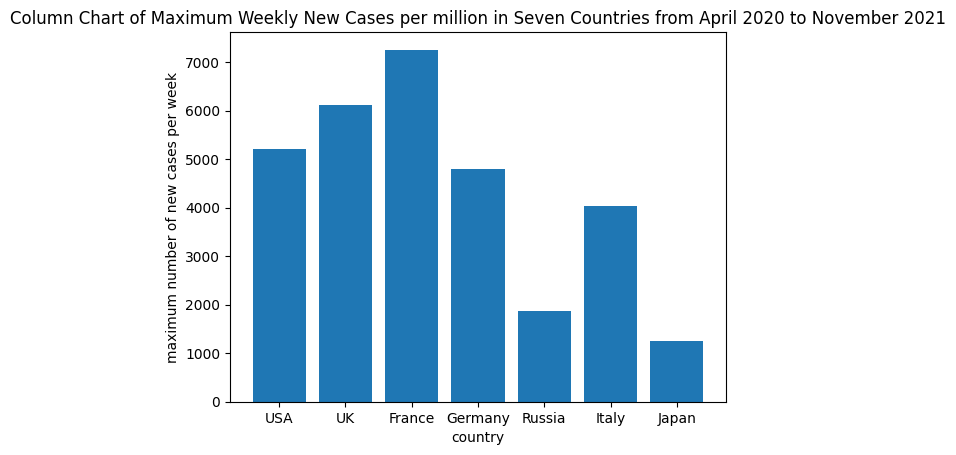

In [154]:
import pandas as pd
import datetime as dt
import numpy as np
import time
import math
import matplotlib.pyplot as plt
def get2(tmp):
    df = pd.read_csv('data.csv')
    df = df[(df['location'] == tmp)]
    df['date'] = pd.to_datetime(df['date'])
    df = df[(df['date'] >= pd.to_datetime('2020-04-01')) & (df['date'] <= pd.to_datetime('2021-11-30'))]
    week_day = pd.DatetimeIndex(df['date'].values).weekday
    new_cases = df['new_cases_per_million'].values
    cnt = 0
    sum = []
    last = 0.0
    for i in range(0, len(week_day)):
        if (not math.isnan(new_cases[i])):
            cnt = cnt + 1
            last = last + new_cases[i]
        if (week_day[i] == 6):
            if (cnt != 0):
                sum.append(int(last / cnt * 7.0))
            else:
                sum.append(0)
            cnt = 0
            last = 0
    mx = max(sum)
    id = 0
    for i in range(0, len(sum)):
        if (sum[i] == mx):
            id = i
            break
    return mx, id + 1

print('[United States] new_cases_per_million:', get2("United States"))
print('[United Kingdom] new_cases_per_million:', get2("United Kingdom"))
print('[France] new_cases_per_million:', get2("France"))
print('[Germany] new_cases_per_million:', get2("Germany"))
print('[Russia] new_cases_per_million:', get2("Russia"))
print('[Italy] new_cases_per_million:', get2("Italy"))
print('[Japan] new_cases_per_million:', get2("Japan"))



x = ['USA','UK', 'France', 'Germany', 'Russia', 'Italy', 'Japan']
y = [get2("United States")[0], get2("United Kingdom")[0], get2("France")[0], get2("Germany")[0], get2("Russia")[0], get2("Italy")[0], get2("Japan")[0]]

plt.title("Column Chart of Maximum Weekly New Cases per million in Seven Countries from April 2020 to November 2021")
plt.bar(x, y)
plt.xlabel("country")
plt.ylabel("maximum number of new cases per week")
plt.show()

由上面的分析可知，自 2020 年 4 月至 2021 年 11 月，七个国家中：
1. 美国的第 41 周（以 2020 年 4 月 1 日所在周为第 1 周计算，即 2020-12-28 作为周一的这周）周新增病例数最高，达 1734748 例。
   原因可能是：美国在此期间，解除了关于“新冠疫情”的全国紧急状态。
2. 法国的第 32 周（以 2020 年 4 月 1 日所在周为第 1 周计算，即 2020-10-26 作为周一的这周）相较于人口数的周新增病例数最高，达 7257 例 / 百万人口。
   原因可能是：法国在此期间，解除了关于“新冠疫情”的全国紧急状态。

# Task 3

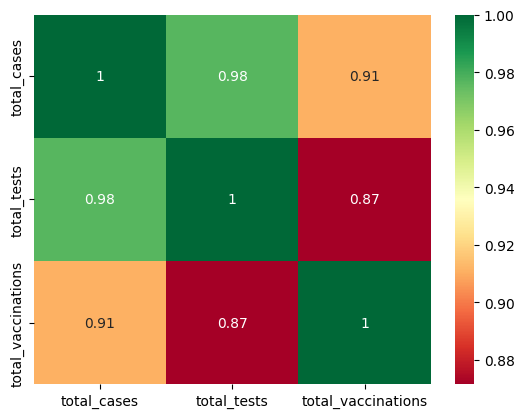

In [171]:
import pandas as pd
import datetime as dt
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data.csv')
df = df[(df['continent'] == 'Asia')]

df['date'] = pd.to_datetime(df['date'])
df = df[(df['date'] >= pd.to_datetime('2021-01-01')) & (df['date'] <= pd.to_datetime('2021-7-31'))]

tm = pd.DataFrame({'total_cases': df['total_cases'].values, 'total_tests': df['total_tests'], 'total_vaccinations': df['total_vaccinations']})
tm.dropna(axis='index', how='any', inplace=True)

ax = sns.heatmap(tm.corr(), vmax = 1, cmap = 'RdYlGn', annot=True)
plt.show()


从亚洲方面来看，使用所有国家的数据进行相关性分析，得到相关性系数热力图如上图所示。
可以得出结论：2021 年 1 月到 7 月之间，感染人数、疫苗接种人数、新冠病毒测试数之间均成强相关性。